In [127]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from scipy import stats
import statistics
from math import sqrt
print("ready")

ready


In [128]:
df = pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [129]:
X = df.drop(columns=['ID', 'ZIP Code', 'Personal Loan'])


In [130]:
y = df["Personal Loan"]

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
logreg = LogisticRegression()
result = logreg.fit(X_train, y_train)
result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
test = X_test

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [135]:
y_hats_df = pd.DataFrame(data = y_pred, columns = ['y_LOGIT'], index = test.index.copy())
df_out = pd.merge(df, y_hats_df, left_index = True, right_index = True)

In [136]:
df_out.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_LOGIT
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0


In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1571  236]
 [  95   98]]


In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.87      0.90      1807
          1       0.29      0.51      0.37       193

avg / total       0.88      0.83      0.85      2000



In [139]:
prob = logreg.predict_proba(X_test)
prob

array([[0.85117262, 0.14882738],
       [0.99694401, 0.00305599],
       [0.95015087, 0.04984913],
       ...,
       [0.93331223, 0.06668777],
       [0.98764907, 0.01235093],
       [0.83184412, 0.16815588]])

In [140]:
y_prob_df = pd.DataFrame(data = prob, columns = ['LG_P_0', 'LG_P_1'], index = test.index.copy())
df_out = pd.merge(df_out, y_prob_df, left_index = True, right_index = True)

In [141]:
df_out.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_LOGIT,LG_P_0,LG_P_1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,0.996807,0.003193
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0.860967,0.139033
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0.917269,0.082731
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0,0.826573,0.173427
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0,0.931241,0.068759


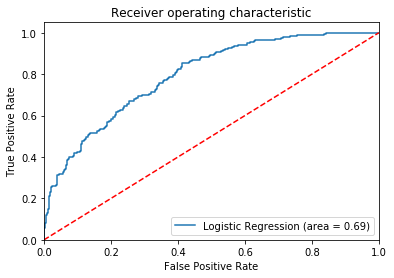

In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [143]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [144]:
y_pred = classifier.predict(X_test)

In [145]:
y_hats_df = pd.DataFrame(data = y_pred, columns = ['y_KNN'], index = df_out.index.copy())
df_out = pd.merge(df_out, y_hats_df, left_index = True, right_index = True)

In [146]:
df_out.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_LOGIT,LG_P_0,LG_P_1,y_KNN
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,0.996807,0.003193,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0.860967,0.139033,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0.917269,0.082731,0
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0,0.826573,0.173427,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0,0.931241,0.068759,0


In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9575


In [148]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1800    7]
 [  78  115]]


In [149]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1807
          1       0.94      0.60      0.73       193

avg / total       0.96      0.96      0.95      2000



In [150]:
prob = classifier.predict_proba(X_test)
prob

array([[0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [151]:
y_prob_df = pd.DataFrame(data = prob, columns = ['KNN_P_0', 'KNN_P_1'], index = test.index.copy())
df_out = pd.merge(df_out, y_prob_df, left_index = True, right_index = True)

In [152]:
df_out.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_LOGIT,LG_P_0,LG_P_1,y_KNN,KNN_P_0,KNN_P_1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,0.996807,0.003193,1,1.0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0.860967,0.139033,0,1.0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0.917269,0.082731,0,1.0,0.0
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0,0.826573,0.173427,0,1.0,0.0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0,0.931241,0.068759,0,1.0,0.0


In [153]:
clf = DecisionTreeClassifier()

In [154]:
clf = clf.fit(X_train,y_train)

In [155]:
y_pred = clf.predict(X_test)

In [156]:
y_hats_df = pd.DataFrame(data = y_pred, columns = ['y_TREE'], index = df_out.index.copy())
df_out = pd.merge(df_out, y_hats_df, left_index = True, right_index = True)

In [157]:
df_out.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,...,CD Account,Online,CreditCard,y_LOGIT,LG_P_0,LG_P_1,y_KNN,KNN_P_0,KNN_P_1,y_TREE
1,2,45,19,34,90089,3,1.5,1,0,0,...,0,0,0,0,0.996807,0.003193,1,1.0,0.0,0
3,4,35,9,100,94112,1,2.7,2,0,0,...,0,0,0,0,0.860967,0.139033,0,1.0,0.0,0
4,5,35,8,45,91330,4,1.0,2,0,0,...,0,0,1,0,0.917269,0.082731,0,1.0,0.0,0
5,6,37,13,29,92121,4,0.4,2,155,0,...,0,1,0,0,0.826573,0.173427,0,1.0,0.0,0
6,7,53,27,72,91711,2,1.5,2,0,0,...,0,1,0,0,0.931241,0.068759,0,1.0,0.0,0


In [158]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.979


In [159]:
print(confusion_matrix(y_test, y_pred))

[[1789   18]
 [  24  169]]


In [160]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1807
          1       0.90      0.88      0.89       193

avg / total       0.98      0.98      0.98      2000



In [161]:
prob = clf.predict_proba(X_test)

In [162]:
y_prob_df = pd.DataFrame(data = prob, columns = ['TREE_P_0', 'TREE_P_1'], index = test.index.copy())
df_out = pd.merge(df_out, y_prob_df, left_index = True, right_index = True)

In [163]:
df_out

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,...,CreditCard,y_LOGIT,LG_P_0,LG_P_1,y_KNN,KNN_P_0,KNN_P_1,y_TREE,TREE_P_0,TREE_P_1
1,2,45,19,34,90089,3,1.5,1,0,0,...,0,0,0.996807,0.003193,1,1.0,0.0,0,1.0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,...,0,0,0.860967,0.139033,0,1.0,0.0,0,1.0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,...,1,0,0.917269,0.082731,0,1.0,0.0,0,1.0,0.0
5,6,37,13,29,92121,4,0.4,2,155,0,...,0,0,0.826573,0.173427,0,1.0,0.0,0,1.0,0.0
6,7,53,27,72,91711,2,1.5,2,0,0,...,0,0,0.931241,0.068759,0,1.0,0.0,0,1.0,0.0
7,8,50,24,22,93943,1,0.3,3,0,0,...,1,0,0.889057,0.110943,0,1.0,0.0,0,1.0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,...,0,0,0.894059,0.105941,0,1.0,0.0,0,1.0,0.0
12,13,48,23,114,93106,2,3.8,3,0,0,...,0,0,0.859288,0.140712,0,0.8,0.2,0,0.0,1.0
13,14,59,32,40,94920,4,2.5,2,0,0,...,0,0,0.810973,0.189027,0,1.0,0.0,0,1.0,0.0
17,18,42,18,81,94305,4,2.4,1,0,0,...,0,0,0.899802,0.100198,0,0.8,0.2,1,1.0,0.0


In [164]:
ensemble = df_out.drop(columns=['ID', 'ZIP Code','Age','Experience', 'Income','ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
                                   'Securities Account', 'CD Account', 'Online', 'CreditCard'])

In [165]:
ensemble

,Personal Loan,y_LOGIT,LG_P_0,LG_P_1,y_KNN,KNN_P_0,KNN_P_1,y_TREE,TREE_P_0,TREE_P_1
1,0,0,0.996807,0.003193,1,1.0,0.0,0,1.0,0.0
3,0,0,0.860967,0.139033,0,1.0,0.0,0,1.0,0.0
4,0,0,0.917269,0.082731,0,1.0,0.0,0,1.0,0.0
5,0,0,0.826573,0.173427,0,1.0,0.0,0,1.0,0.0
6,0,0,0.931241,0.068759,0,1.0,0.0,0,1.0,0.0
7,0,0,0.889057,0.110943,0,1.0,0.0,0,1.0,0.0
11,0,0,0.894059,0.105941,0,1.0,0.0,0,1.0,0.0
12,0,0,0.859288,0.140712,0,0.8,0.2,0,0.0,1.0
13,0,0,0.810973,0.189027,0,1.0,0.0,0,1.0,0.0
17,0,0,0.899802,0.100198,0,0.8,0.2,1,1.0,0.0


In [166]:
ensemble.head()

,Personal Loan,y_LOGIT,LG_P_0,LG_P_1,y_KNN,KNN_P_0,KNN_P_1,y_TREE,TREE_P_0,TREE_P_1
1,0,0,0.996807,0.003193,1,1.0,0.0,0,1.0,0.0
3,0,0,0.860967,0.139033,0,1.0,0.0,0,1.0,0.0
4,0,0,0.917269,0.082731,0,1.0,0.0,0,1.0,0.0
5,0,0,0.826573,0.173427,0,1.0,0.0,0,1.0,0.0
6,0,0,0.931241,0.068759,0,1.0,0.0,0,1.0,0.0


In [167]:
ensemble['Avg_Prob_1'] = ensemble[['LG_P_1', 'KNN_P_1', 'TREE_P_1']].mean(axis=1)

In [168]:
ensemble['Avg_Prob_0'] = ensemble[['LG_P_0', 'KNN_P_0', 'TREE_P_0']].mean(axis=1)
ensemble

,Personal Loan,y_LOGIT,LG_P_0,LG_P_1,y_KNN,KNN_P_0,KNN_P_1,y_TREE,TREE_P_0,TREE_P_1,Avg_Prob_1,Avg_Prob_0
1,0,0,0.996807,0.003193,1,1.0,0.0,0,1.0,0.0,0.001064,0.998936
3,0,0,0.860967,0.139033,0,1.0,0.0,0,1.0,0.0,0.046344,0.953656
4,0,0,0.917269,0.082731,0,1.0,0.0,0,1.0,0.0,0.027577,0.972423
5,0,0,0.826573,0.173427,0,1.0,0.0,0,1.0,0.0,0.057809,0.942191
6,0,0,0.931241,0.068759,0,1.0,0.0,0,1.0,0.0,0.022920,0.977080
7,0,0,0.889057,0.110943,0,1.0,0.0,0,1.0,0.0,0.036981,0.963019
11,0,0,0.894059,0.105941,0,1.0,0.0,0,1.0,0.0,0.035314,0.964686
12,0,0,0.859288,0.140712,0,0.8,0.2,0,0.0,1.0,0.446904,0.553096
13,0,0,0.810973,0.189027,0,1.0,0.0,0,1.0,0.0,0.063009,0.936991
17,0,0,0.899802,0.100198,0,0.8,0.2,1,1.0,0.0,0.100066,0.899934


In [169]:
ensembleMODE = ensemble[["y_LOGIT", "y_KNN", "y_TREE"]]

In [170]:
mode = ensembleMODE.mode(axis=1)[:]

In [171]:
ensemble_new = pd.merge(ensemble, mode, left_index = True, right_index = True)

In [172]:
ensemble_new.rename(columns={0: "Major_Vote"}, inplace=True)

In [173]:
ensemble_new

,Personal Loan,y_LOGIT,LG_P_0,LG_P_1,y_KNN,KNN_P_0,KNN_P_1,y_TREE,TREE_P_0,TREE_P_1,Avg_Prob_1,Avg_Prob_0,Major_Vote
1,0,0,0.996807,0.003193,1,1.0,0.0,0,1.0,0.0,0.001064,0.998936,0
3,0,0,0.860967,0.139033,0,1.0,0.0,0,1.0,0.0,0.046344,0.953656,0
4,0,0,0.917269,0.082731,0,1.0,0.0,0,1.0,0.0,0.027577,0.972423,0
5,0,0,0.826573,0.173427,0,1.0,0.0,0,1.0,0.0,0.057809,0.942191,0
6,0,0,0.931241,0.068759,0,1.0,0.0,0,1.0,0.0,0.022920,0.977080,0
7,0,0,0.889057,0.110943,0,1.0,0.0,0,1.0,0.0,0.036981,0.963019,0
11,0,0,0.894059,0.105941,0,1.0,0.0,0,1.0,0.0,0.035314,0.964686,0
12,0,0,0.859288,0.140712,0,0.8,0.2,0,0.0,1.0,0.446904,0.553096,0
13,0,0,0.810973,0.189027,0,1.0,0.0,0,1.0,0.0,0.063009,0.936991,0
17,0,0,0.899802,0.100198,0,0.8,0.2,1,1.0,0.0,0.100066,0.899934,0


In [174]:
ensemble_new["Avg_Prob_Bin1"] = ''

In [175]:
def myfunc(x):
    y=1
    z=0
    if x > .50:
        return y
    else:
        return z
     

ensemble_new["Avg_Prob_Bin1"] = ensemble_new.apply(lambda x: myfunc(x.Avg_Prob_1), axis=1)

In [176]:
ensemble_new

,Personal Loan,y_LOGIT,LG_P_0,LG_P_1,y_KNN,KNN_P_0,KNN_P_1,y_TREE,TREE_P_0,TREE_P_1,Avg_Prob_1,Avg_Prob_0,Major_Vote,Avg_Prob_Bin1
1,0,0,0.996807,0.003193,1,1.0,0.0,0,1.0,0.0,0.001064,0.998936,0,0
3,0,0,0.860967,0.139033,0,1.0,0.0,0,1.0,0.0,0.046344,0.953656,0,0
4,0,0,0.917269,0.082731,0,1.0,0.0,0,1.0,0.0,0.027577,0.972423,0,0
5,0,0,0.826573,0.173427,0,1.0,0.0,0,1.0,0.0,0.057809,0.942191,0,0
6,0,0,0.931241,0.068759,0,1.0,0.0,0,1.0,0.0,0.022920,0.977080,0,0
7,0,0,0.889057,0.110943,0,1.0,0.0,0,1.0,0.0,0.036981,0.963019,0,0
11,0,0,0.894059,0.105941,0,1.0,0.0,0,1.0,0.0,0.035314,0.964686,0,0
12,0,0,0.859288,0.140712,0,0.8,0.2,0,0.0,1.0,0.446904,0.553096,0,0
13,0,0,0.810973,0.189027,0,1.0,0.0,0,1.0,0.0,0.063009,0.936991,0,0
17,0,0,0.899802,0.100198,0,0.8,0.2,1,1.0,0.0,0.100066,0.899934,0,0


In [177]:
y_pred = ensemble_new["Avg_Prob_Bin1"]

In [178]:
y_test = ensemble_new["Personal Loan"]

In [179]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [180]:
confusion_matrix

array([[1798,    9],
       [  53,  140]])

In [181]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1807
          1       0.94      0.73      0.82       193

avg / total       0.97      0.97      0.97      2000



In [182]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.969


In [183]:
pred = ensemble_new["Major_Vote"]

In [184]:
test = ensemble_new["Personal Loan"]

In [185]:
from sklearn.metrics import classification_report, confusion_matrix


In [186]:
matrix = confusion_matrix(test, pred)

In [187]:
matrix

array([[1705,  102],
       [ 173,   20]])

In [188]:
print(classification_report(test, pred))

             precision    recall  f1-score   support

          0       0.91      0.94      0.93      1807
          1       0.16      0.10      0.13       193

avg / total       0.84      0.86      0.85      2000



In [189]:
print("Accuracy:",metrics.accuracy_score(test, pred))

Accuracy: 0.8625
